In [23]:
# Importing required libraries
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import datetime as dt1
from datetime import datetime as dt
import quandl
import datetime


# Getting the google dataset
# and store it in the variable 'df'
API_KEY = str(open('./API.txt').read()).replace('\n', '')
df = quandl.get("WIKI/GOOG", api_key=API_KEY)

print(df.tail())


               Open     High      Low    Close     Volume  Ex-Dividend  \
Date                                                                     
2018-03-21  1092.74  1106.30  1085.15  1090.88  1640709.0          0.0   
2018-03-22  1081.88  1082.90  1045.91  1049.08  2580374.0          0.0   
2018-03-23  1047.03  1063.36  1021.22  1021.57  2113497.0          0.0   
2018-03-26  1046.00  1055.63  1008.40  1053.21  2558385.0          0.0   
2018-03-27  1063.00  1064.84   996.92  1005.10  3029471.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2018-03-21          1.0    1092.74    1106.30   1085.15     1090.88   
2018-03-22          1.0    1081.88    1082.90   1045.91     1049.08   
2018-03-23          1.0    1047.03    1063.36   1021.22     1021.57   
2018-03-26          1.0    1046.00    1055.63   1008.40     1053.21   
2018-03-27          1.0    1063.00    1064.84    996.92

In [2]:
# We are gonna use Adj. Close in order to predict the stock
df = df[['Adj. Close']]

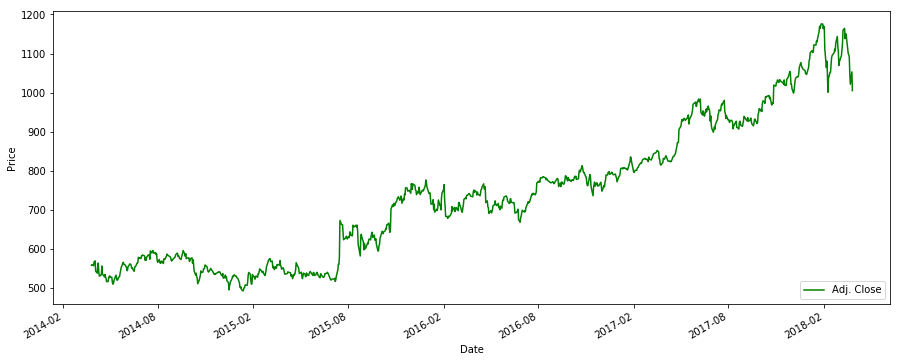

In [3]:
# forecast_out variable is keeping track of how many days into the future we want to predict
forecast_out = int(30) # 30 days into the future
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)

# printing a plot to show the evolution of Google stock in time
df['Adj. Close'].plot(figsize=(15, 6), color="green")
# creating the labels 
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [4]:
X = np.array(df.drop(['Prediction'], 1))
# scaling our features to normalize data
X = preprocessing.scale(X)
X

array([[-1.01398948],
       [-1.00530839],
       [-1.02244361],
       ...,
       [ 1.61365657],
       [ 1.79317919],
       [ 1.52020722]])

In [5]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
X = X[:-forecast_out] # remove last 30 from X

# y is going to be our prediction array 
Y = np.array(df['Prediction'])
Y = Y[:-forecast_out]
print(Y)

[ 518.73    529.92    533.09    526.65    519.98    520.63    528.86
  529.77    538.94    545.06    552.7     565.95    561.68    560.08
  559.89    553.93    544.94    544.66    553.9     556.33    562.12
  560.55    558.84    551.35    551.76    544.28    543.01    553.37
  554.9     556.36    564.95    564.62    578.65    576.      577.24
  575.28    582.67    582.335   584.73    582.25    571.09    576.08
  571.1     579.18    584.87    584.78    582.66    573.7299  595.08
  589.47    594.74    595.98    593.35    589.02    590.6     585.61
  587.42    571.6     566.07    573.15    565.07    566.374   563.36
  568.77    567.88    562.73    574.78    574.65    573.48    582.16
  586.86    584.49    583.37    582.56    580.2     577.86    571.
  569.2     571.6     577.33    577.94    581.98    586.08    589.72
  581.01    583.1     581.35    575.62    573.1     579.95    584.77
  589.27    596.08    587.37    581.13    587.99    575.06    577.1
  576.36    577.36    568.27    570.0

In [6]:
# we take 20% of the train data and use it for prediction
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.2)

# LINEAR REGRESSION 
# Training our algorithm
clf = LinearRegression()
clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print("Accuracy: ", accuracy)


Accuracy:  0.9436130334136866


In [7]:
# showing the last 30 days
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[1074.24352397 1092.13157478 1112.27595928 1117.64237452 1125.42774209
 1134.45307682 1129.66599049 1150.15593961 1167.39351584 1141.51682416
 1127.7348941  1091.94862881 1101.50247413 1113.70903607 1117.90662982
 1132.72525373 1149.35301005 1183.95012651 1188.48312121 1161.72219064
 1173.22745969 1173.31893268 1159.24225633 1122.74453447 1120.6000011
 1113.65821775 1071.17409707 1043.21385401 1075.37169081 1026.47429736]


Last date:  2018-02-12 00:00:00


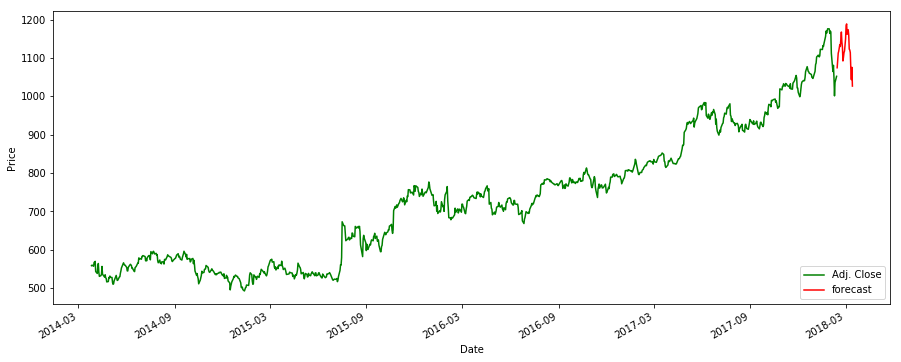

In [8]:
# Ploting th epredicted prices
df.dropna(inplace=True)
# initialiseing a new column called forecast with nan
df['forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

print('Last date: ',last_date)
# print('Last unix: ', last_unix)


# adding predictions to the data frame to create the next 30 days
for i in forecast_prediction:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

df['Adj. Close'].plot(figsize=(15,6), color="green")
df['forecast'].plot(figsize=(15,6), color="red")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [17]:
# SUPORT VECTOR MACHINE PREDICTION

# initialising lists used for prediction
prices = []
dates = []

# getting data frame
df = quandl.get("WIKI/GOOG")
# selecting only the features I would need 
df = df[['Adj. Close']]
df = df.reset_index()

# print(df['Date'].dt.days)
#print(df['Date'])
# print('After conversion')
# for row in df['Date']:
#     print(np.datetime64(row))
#     dt64 = np.datetime64(row)
#     ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
#     print(ts)

# interate over rows in pandas
# row[0] - date
# row[1] - price
# scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
for _, row in df.iterrows():
    #dates.append(int(str(row[0]).split('-')[2].split(' ')[0]))
    dt64 = np.datetime64(row[0])
    ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
    #print(ts)
    dates.append(ts)
    prices.append(float(row[1]))

dates = np.reshape(dates, (len(dates), 1))
scalar = preprocessing.Normalizer().fit(dates)
normalizedDates = scaler.transform(X)
print(normalizedDates)
# print(dates)
# print(prices)

LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Quandl account and then include your API key with your requests.

In [ ]:
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

# SV needs a 2D array so I am converting the 1D data to 2D 
dates = np.reshape(dates, (len(dates), 1))


# start fiting
# svr_rbf.fit(dates, prices) 
# svr_lin.fit(dates, prices)
# svr_poly.fit(dates, prices)


# plt.scatter(dates, prices, color= 'black', label= 'Data')
# # plotting the line made by the RBF kernel
# plt.plot(dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model')
# # plotting the line made by linear kernel
# plt.plot(dates,svr_lin.predict(dates), color= 'green', label= 'Linear model') 
#  # plotting the line made by polynomial kernel
# plt.plot(dates,svr_poly.predict(dates), color= 'blue', label= 'Polynomial model')
# plt.xlabel('Date') 
# plt.ylabel('Price')
# plt.title('Support Vector Regression') 
# plt.legend() 
# plt.show()

# day = 0
# print('SVR RBF: ', svr_rbf.predict(day)[0])
# print('SVR LIN: ',svr_lin.predict(day)[0])
# print('SVR POLY: ', svr_poly.predict(day)[0])
